# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Airbnb, Inc. is an online marketplace for long & short term rental accomodations founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia.

This Project will include all the process that is required to perform data analysis - Data Discovery & Understanding, Wrangling , visualization & statistical analysis when required.

We analyzed the given dataset which had around 49000 listings. Our main objective is to find key factors that influence the properties listings & relationships between them. We will achieve this in various steps

Data discovery - where we import the data & get some information about the data,

Data cleaning / wrangling - where we will check the data for any inconsistencies & clean the data to make it more useful for later steps,

EDA or exploratory data analysis - where we will analyze the data using charts & statistics [if necessary]. This can help us finding valuable insights that we can use to make descisions that will help our organisation to increase their profits.

# **GitHub Link -**

https://github.com/ParasChopra611/AlmaBetter/tree/main/Module%202%20AirBnB%20Booking%20Analysis

# **Problem Statement**







Our main focus is to analyse the data consisting of thousands of listings to find out the key factors that influences the listing & rates of the properties on the online platform. This data analysis will include practices such as data wrangling , statistical analysis & visualizations to find key observations that might help with improving the business performance.



#### **Define Your Business Objective?**

The objective is to find the observations that will help in improving the business performances.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/AA AlmaBetter/Module 2 AirBnB/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

The dataset has 48895 rows & 16 columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

There are no duplicated values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

this shows missing values in each column

<Axes: >

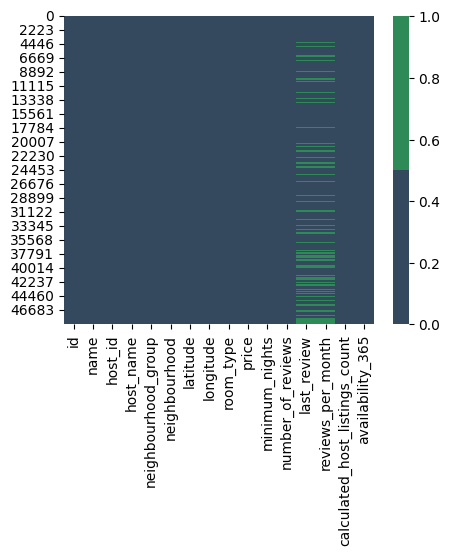

In [ ]:
# Visualizing the missing values
#using hbeatmap

plt.figure(figsize=(5,4))

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))



both columns have null vals[green] in same rows

since theres a lot of null values , i need to impute null vals

for numerical columns , replace null vals with median val [just in case if theres outliers]

for categorical columns , replace null vals with 'null' string

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna('NULL')
  else:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

so all null values have been dealt with

### What did you know about your dataset?

The dataset contains information about all properties for rent.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,4.889500e+04,48895,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
unique,NaN,47906,NaN,11453,5,221,NaN,NaN,3,NaN,NaN,NaN,1765,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NULL,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,10052,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.238930,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.520861,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.280000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,1.580000,2.000000,227.000000


### Variables Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


ID - Identity number for each listing

name - name of property

HostID - identity number for host/property owner

Host_name - name of host/owner

neighborhood group - a set of neighborhood clubbed together

neighborhood - locality in the city

latitude & longitute - geographical coordinate system

room_type - type & orientation of room

price - rate charged by customer per night

minimum_nights - minimum number of nights stayed by customer

number of reviews - number of reviews given by customers

last review - date when last review was given

reviews per month - number of reviews given by customer per month averagely

calculated_host_listings_count - total count

availability_365  -availability around the year



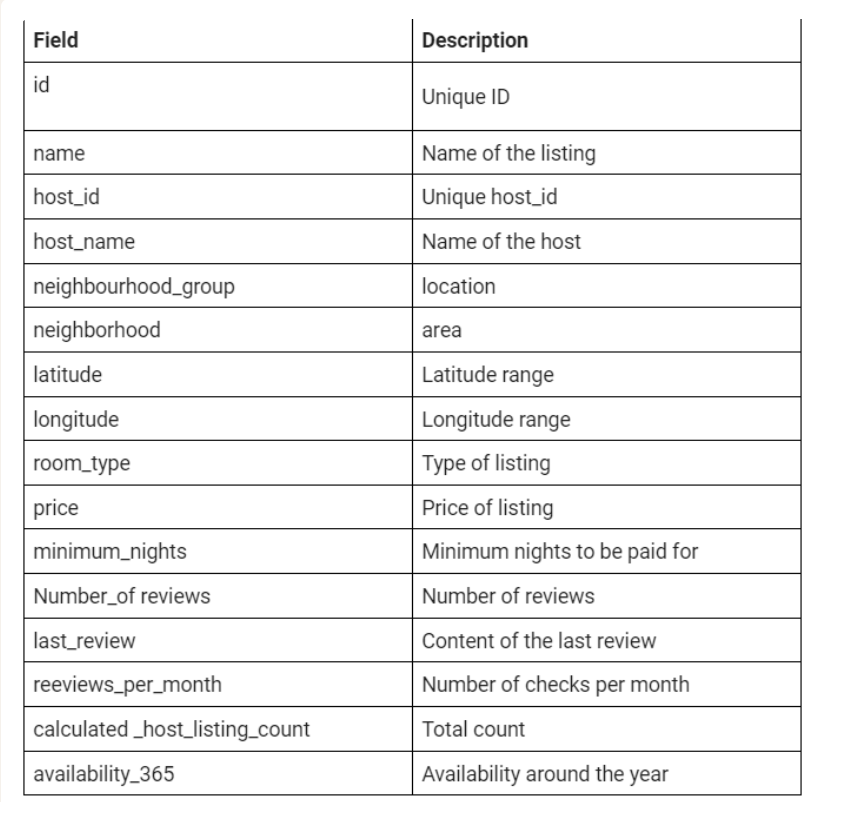



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

# using for loop

for i in df.columns:
  unique_l = df[i].unique()
  print(f' \n\n---- Unique vals for column "{i}"----- \n\n {unique_l}')

 

---- Unique vals for column "id"----- 

 [    2539     2595     3647 ... 36485431 36485609 36487245]
 

---- Unique vals for column "name"----- 

 ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
 

---- Unique vals for column "host_id"----- 

 [     2787      2845      4632 ... 274321313  23492952  68119814]
 

---- Unique vals for column "host_name"----- 

 ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
 

---- Unique vals for column "neighbourhood_group"----- 

 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
 

---- Unique vals for column "neighbourhood"----- 

 ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort 

## 3. ***Data Wrangling***

### Data Wrangling Code

1st remove useless columns

In [ ]:
df = df.drop(['id','host_id'] , axis=1)

Here I will do the data cleaning/wrangling for each column

In [ ]:
# Write your code to make your dataset analysis ready.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

1st i will analyse all categorical columns using for loop, creating distribution table for each categorical column



In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"\n\n ----- frequency distrinution for column {col} -----\n\n ")
    print(df[col].value_counts(dropna=True, sort = True))




 ----- frequency distrinution for column name -----

 
Hillside Hotel                                        18
Home away from home                                   17
NULL                                                  16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47906, dtype: int64


 ----- frequency distrinution for column host_name -----

 
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony     

Now lets do the same for numerical columns, also create histigrams for each

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    print(f"\n\n ----- frequency distrinution for column {col} -----\n\n ")
    print(df[col].value_counts(dropna=True, sort = True))




 ----- frequency distrinution for column latitude -----

 
40.71813    18
40.68444    13
40.69414    13
40.68634    13
40.76125    12
            ..
40.78084     1
40.66767     1
40.77473     1
40.79343     1
40.81475     1
Name: latitude, Length: 19048, dtype: int64


 ----- frequency distrinution for column longitude -----

 
-73.95677    18
-73.95427    18
-73.95405    17
-73.95060    16
-73.94791    16
             ..
-73.85155     1
-73.83167     1
-73.85058     1
-73.79232     1
-73.80844     1
Name: longitude, Length: 14718, dtype: int64


 ----- frequency distrinution for column price -----

 
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64


 ----- frequency distrinution for column minimum_nights -----

 
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: mi

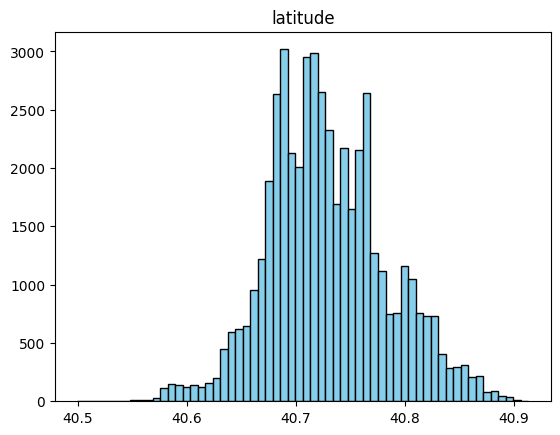

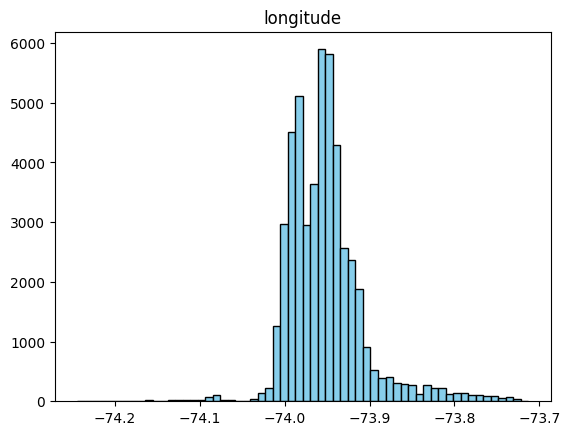

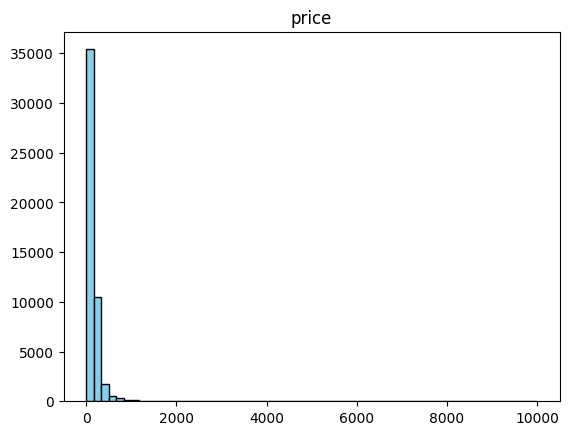

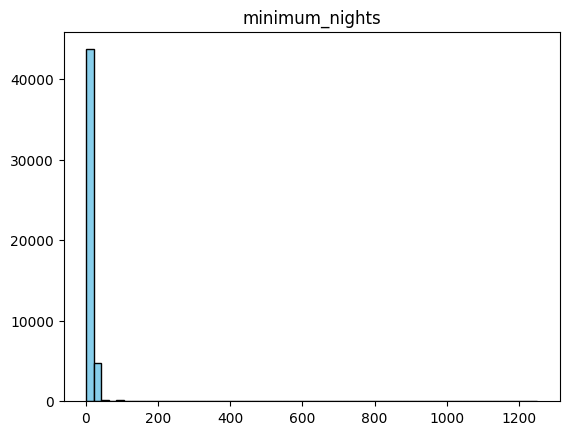

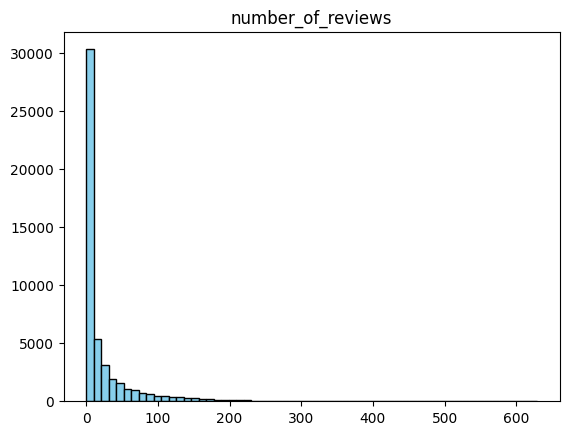

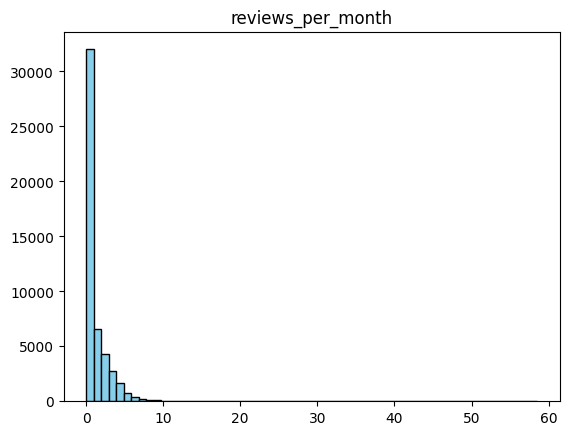

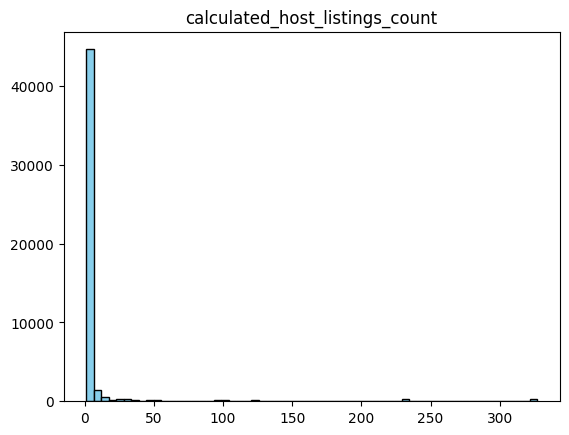

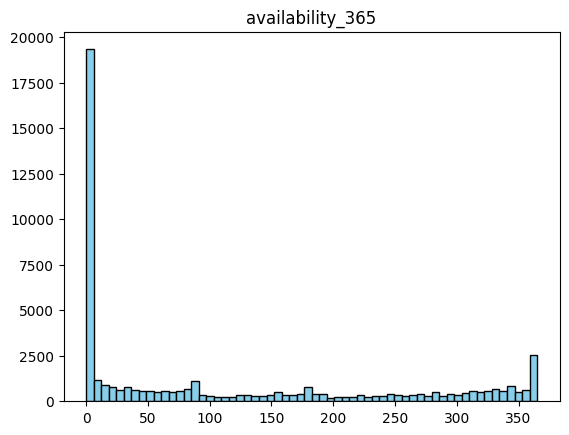

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.hist(df[col], bins=60, color='skyblue', edgecolor='black') #

    # Adding labels and title
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
    plt.title(col)

    # Display the plot
    plt.show()

### What all manipulations have you done and insights you found?

1] removed useless columns - ID ,Host ID

2] imputed null values with NUll[in categorical columns] & median[in numerical columns]

3]

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Univariate analysis - count of neighborhood group & neighborhood

In [ ]:
# Chart - 1 visualization code

# frequency table for each neighborhood_group & neighborhood , top 10
temp = df.groupby(['neighbourhood_group', 'neighbourhood']).size().nlargest(10)

temp

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
dtype: int64

<Axes: title={'center': 'Count per neighborhood group, neighborhood'}, xlabel='Neighborhood Group', ylabel='Count'>

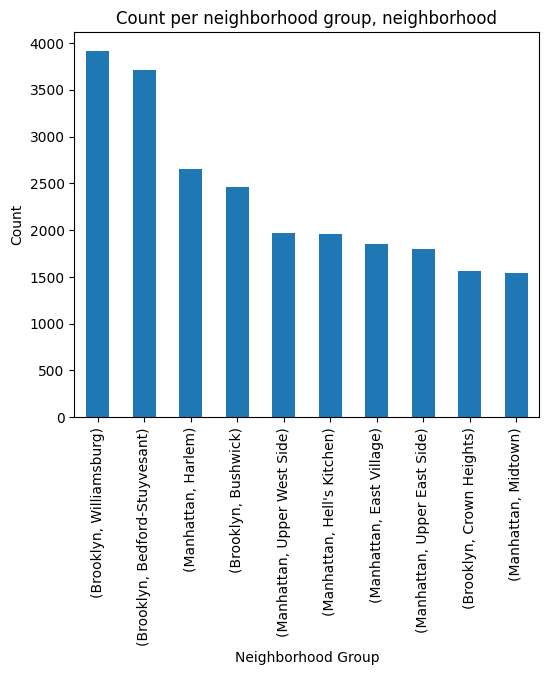

In [ ]:
temp.plot(kind='bar', title='Count per neighborhood group, neighborhood', ylabel='Count',
         xlabel='Neighborhood Group', figsize=(6, 5))

##### 1. Why did you pick the specific chart?

Bar chart are best for comparing all categorical values

##### 2. What is/are the insight(s) found from the chart?

Most of listings are in brooklyn or manhattan

##### 3. Will the gained insights help creating a positive business impact?

If you want to rent out flats , then brooklyn & manhattan are the best places to do it

#### Chart - 2

Count of room type  - pie chart

([<matplotlib.patches.Wedge at 0x7cde74e817b0>,
 [Text(-0.06791271159741047, 1.0979015728213013, 'Entire home/apt'),
  Text(-0.014029046165556239, -1.0999105353908039, 'Private room'),
  Text(1.096946139126023, -0.08190951017135857, 'Shared room')],
 [Text(-0.037043297234951165, 0.5988554033570733, '51.97%'),
  Text(-0.00765220699939431, -0.5999512011222565, '45.66%'),
  Text(0.5983342577051034, -0.04467791463892285, '2.37%')])

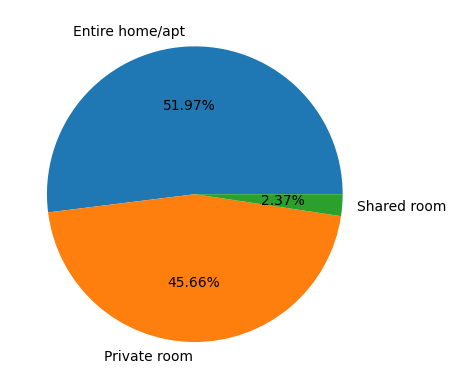

In [ ]:
#frequency distrib datafrakme
value_counts = df['room_type'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)

plt.pie(df_val_counts['room_type'], labels=df_val_counts.index, autopct='%.2f%%')

##### 1. Why did you pick the specific chart?

Pie charts are the best for univariate analysis in the form of parts to whole

##### 2. What is/are the insight(s) found from the chart?

Entire homes & private rooms are majority of listings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Seems like private rooms & entire homes are in demand

#### Chart - 3

Latitude distribution - histogram

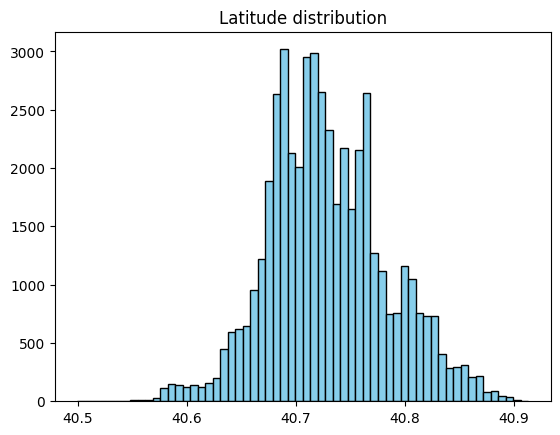

In [ ]:
plt.hist(df['latitude'], bins=60, color='skyblue', edgecolor='black') #

plt.title('Latitude distribution')

    # Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Histogram is suitable for univariate analysis in the form of bars

##### 2. What is/are the insight(s) found from the chart?

Majority of listings lies between latitudes - 40.65 - 40.75

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If you want to advertise your flat you can do it in these locations

#### Chart - 4

longitude distribution - histogram

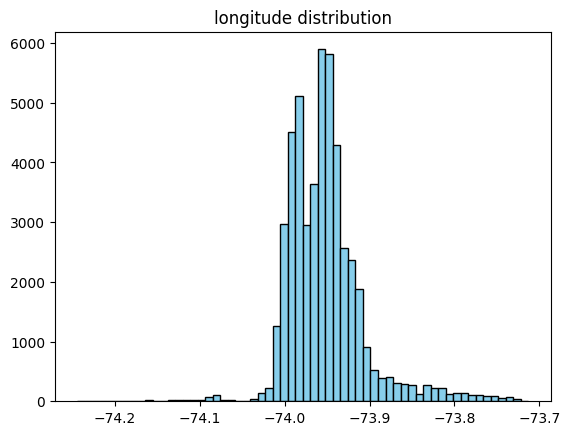

In [ ]:
plt.hist(df['longitude'], bins=60, color='skyblue', edgecolor='black') #

plt.title('longitude distribution')

    # Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best suited for study univariate analysis

##### 2. What is/are the insight(s) found from the chart?

majority of listings lie in longitude ranges - 74-73.9

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this can help us to find where we should advwertise our flats to rent

#### Chart - 5

minimum nights distribution - histogram

In [ ]:
temp = df[df['minimum_nights']<50]


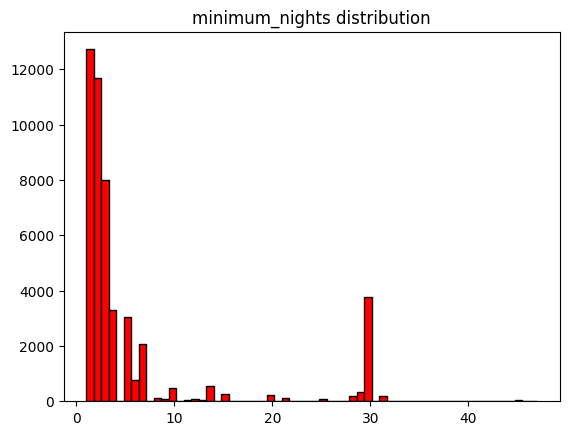

In [ ]:


plt.hist(temp['minimum_nights'], bins=60, color='red', edgecolor='black') #

plt.title('minimum_nights distribution')

    # Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

histograms are best for univariate analysis

##### 2. What is/are the insight(s) found from the chart?

majority of listings have 0 to 10 min nights, theres also a a considerable number of 30 minimum nights

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

0 to 10 minimum nights & 30 nights package seems to be the industry standards

#### Chart - 6

availability 365 distribution - histogram

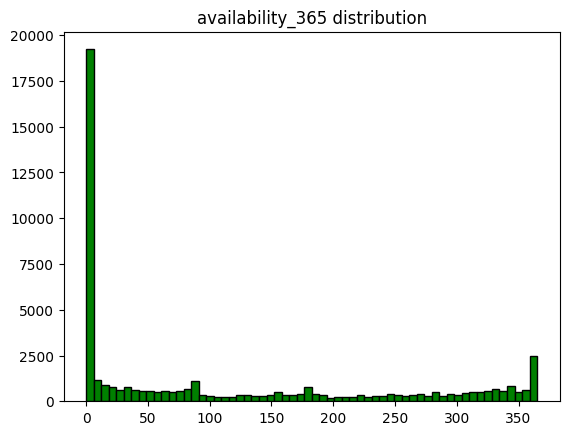

In [ ]:
# Chart - 6 visualization code



plt.hist(temp['availability_365'], bins=60, color='green', edgecolor='black') #

    # Adding labels and title
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
plt.title('availability_365 distribution')

    # Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Histogram is the best for univariate distribution visualization

##### 2. What is/are the insight(s) found from the chart?

majority of listings are available for 0-100 days per year , msot likely weekends [52 weeks per year ie 52 weekends ie around 100 days]. There are also a lot of listings that are available almost entire year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If youre starting a rental business , then its advisable to make it available for weekends.

#### Chart - 7

Bivariate analysis - Avg Price per neighborhood group & neighborhood

In [ ]:
# Chart - 1 visualization code
temp = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().nlargest(10)

temp

neighbourhood_group  neighbourhood    
Staten Island        Fort Wadsworth       800.000000
                     Woodrow              700.000000
Manhattan            Tribeca              490.638418
Brooklyn             Sea Gate             487.857143
Bronx                Riverdale            442.090909
Staten Island        Prince's Bay         409.500000
Manhattan            Battery Park City    367.557143
                     Flatiron District    341.925000
Staten Island        Randall Manor        336.000000
Manhattan            NoHo                 295.717949
Name: price, dtype: float64

<Axes: title={'center': 'Count per neighborhood group, neighborhood'}, xlabel='Neighborhood Group', ylabel='Count'>

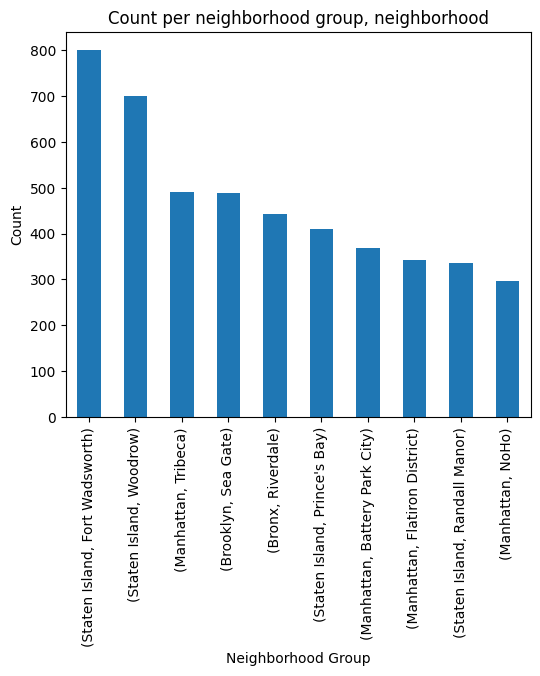

In [ ]:
temp.plot(kind='bar', title='Count per neighborhood group, neighborhood', ylabel='Count',
         xlabel='Neighborhood Group', figsize=(6, 5))

##### 1. Why did you pick the specific chart?

Bar Graph are the best for comparing categorical values

##### 2. What is/are the insight(s) found from the chart?

Staten Island & manhattan are the most expensive , then bronx & brooklyn

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If you want to setup a high end apartment for rent theses are the places to do so - Staten islands , manhattan

#### Chart - 8

Price vs latitude  - scatterplot

<Axes: xlabel='latitude', ylabel='price'>

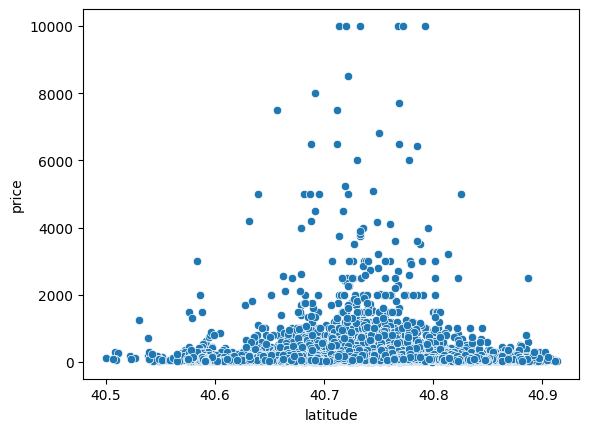

In [ ]:
# Chart - 5 visualization code

sns.scatterplot(data=df, x="latitude", y="price")


##### 1. Why did you pick the specific chart?

Scatterplot is the best for analyzing correlation between 2 numerical variables

##### 2. What is/are the insight(s) found from the chart?

the prices & number of listings seems to be higher between latitudes 40.6 - 40.8

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For advertising and setting up your rental business , the above latitude range is the best

#### Chart - 9

Price vs longitude , scatterplot

<Axes: xlabel='longitude', ylabel='price'>

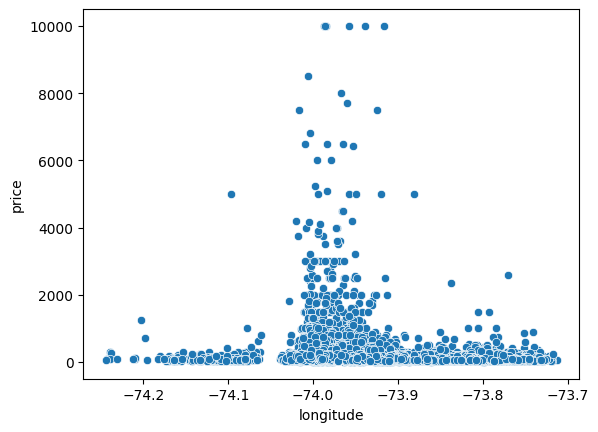

In [ ]:
# Chart - 5 visualization code

sns.scatterplot(data=df, x="longitude", y="price")


##### 1. Why did you pick the specific chart?

Scatterplot is the best to analyze the correlation between 2 numerical variables

##### 2. What is/are the insight(s) found from the chart?

Majority of listings lie between longitude -74 to -73.9

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graph shows that the longitude range above has the highest number of renting opportunities & its the best for advertizement

#### Chart - 10

Avg price per room_type

In [ ]:
# Chart - 1 visualization code
temp = df.groupby(['room_type'])['price'].mean().nlargest(10)

temp

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

<Axes: title={'center': 'Avg price per room type'}, xlabel='room type', ylabel='Avg Price'>

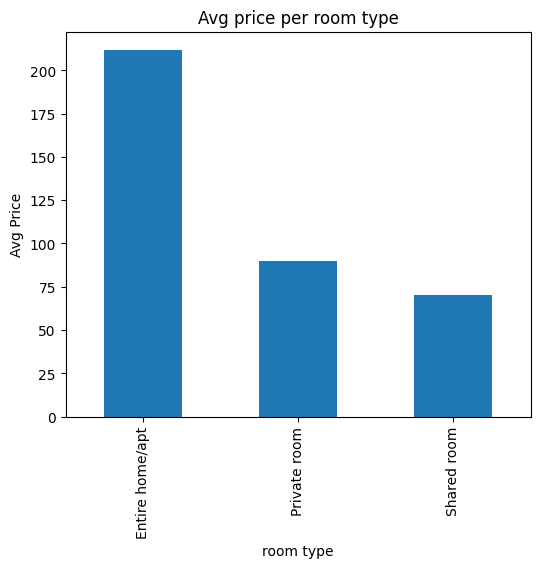

In [ ]:
temp.plot(kind='bar', title='Avg price per room type', ylabel='Avg Price',
         xlabel='room type', figsize=(6, 5))

##### 1. Why did you pick the specific chart?

bar chart are the best to compare categorical values

##### 2. What is/are the insight(s) found from the chart?

Entire homes/apartmentys are the most expensive, followed by private rooms

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For maximum profits , invest in entire apatments/rooms & private rooms

#### Chart - 11

Price vs minimum nights , scatter plot

<Axes: xlabel='minimum_nights', ylabel='price'>

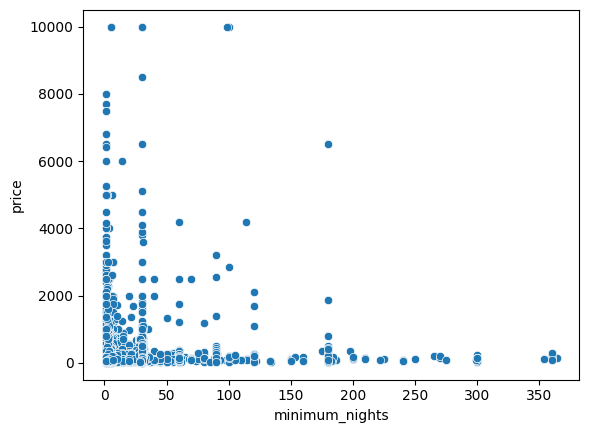

In [ ]:
# Chart - 11 visualization code

temp = df[df['minimum_nights']<365]

sns.scatterplot(data=temp, x="minimum_nights", y="price")


lets zoom in a bit

<Axes: xlabel='minimum_nights', ylabel='price'>

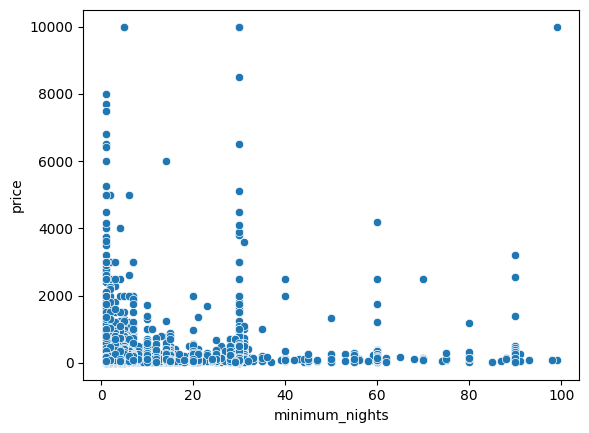

In [ ]:
# Chart - 11 visualization code

temp = df[df['minimum_nights']<100]

sns.scatterplot(data=temp, x="minimum_nights", y="price")


##### 1. Why did you pick the specific chart?

Scatterplot is best to analyze correlation between 2 variables

##### 2. What is/are the insight(s) found from the chart?



*   it seems like listings with lesser minimum nights seems to be more popular & charge more.

*   seems like 30 nights plan are popular too , followed by 60 & 90 nights plans.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Keep the minimum nights as less as possible while setting up your rental business. also include 30,60,90 days package

#### Chart - 12

avg Availability per room type - bar chart

In [ ]:
# Chart - 1 visualization code
temp = df.groupby(['room_type'])['availability_365'].mean().nlargest(10)

temp

room_type
Shared room        162.000862
Entire home/apt    111.920304
Private room       111.203933
Name: availability_365, dtype: float64

<Axes: title={'center': 'Avg price per room type'}, xlabel='room type', ylabel='Avg availability'>

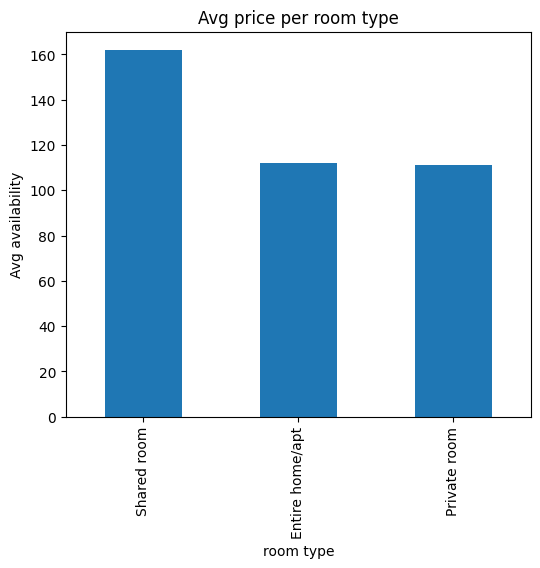

In [ ]:
temp.plot(kind='bar', title='Avg price per room type', ylabel='Avg availability',
         xlabel='room type', figsize=(6, 5))

##### 1. Why did you pick the specific chart?

bar charts are the best for comparing categorical values

##### 2. What is/are the insight(s) found from the chart?

Shared rooms have the most availability , followed by entire home & private rooms

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If you want to gain max profits , increase availability in entire rooms since theyre more expensive & hence more profitable

#### Chart - 13

Availability per neighborhood group [& neighborhood]

In [ ]:
# top 10 neighborhoods based on mean availability
temp = df.groupby(['neighbourhood_group', 'neighbourhood'])['availability_365'].mean().nlargest(10)

temp

neighbourhood_group  neighbourhood 
Staten Island        Fort Wadsworth    365.000000
Bronx                Co-op City        364.000000
Staten Island        Willowbrook       351.000000
Bronx                Eastchester       333.461538
Staten Island        Richmondtown      300.000000
Brooklyn             Mill Basin        290.000000
Queens               Edgemere          275.272727
Staten Island        Randall Manor     275.210526
                     West Brighton     274.722222
Bronx                Spuyten Duyvil    270.000000
Name: availability_365, dtype: float64

<Axes: title={'center': 'avg availability_365 per neighborhood group, neighborhood'}, xlabel='Neighborhood Group', ylabel='avg availability_365'>

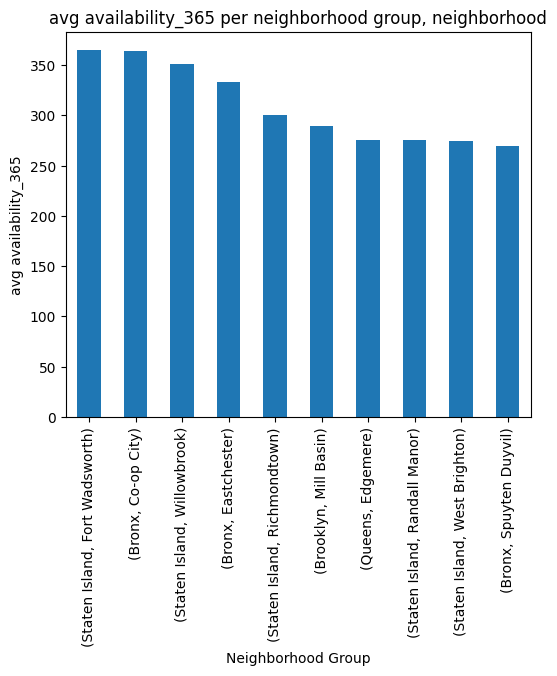

In [ ]:
temp.plot(kind='bar', title='avg availability_365 per neighborhood group, neighborhood', ylabel='avg availability_365',
         xlabel='Neighborhood Group', figsize=(6, 5))

##### 1. Why did you pick the specific chart?

Bar charts are the best to compare categorical variables

##### 2. What is/are the insight(s) found from the chart?

listings in staten islands & bronx seems to have highest availability , followed by brooklyn & queens

#### Chart - 14 - Correlation Heatmap

<ipython-input-46-b9579365109c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df.corr()


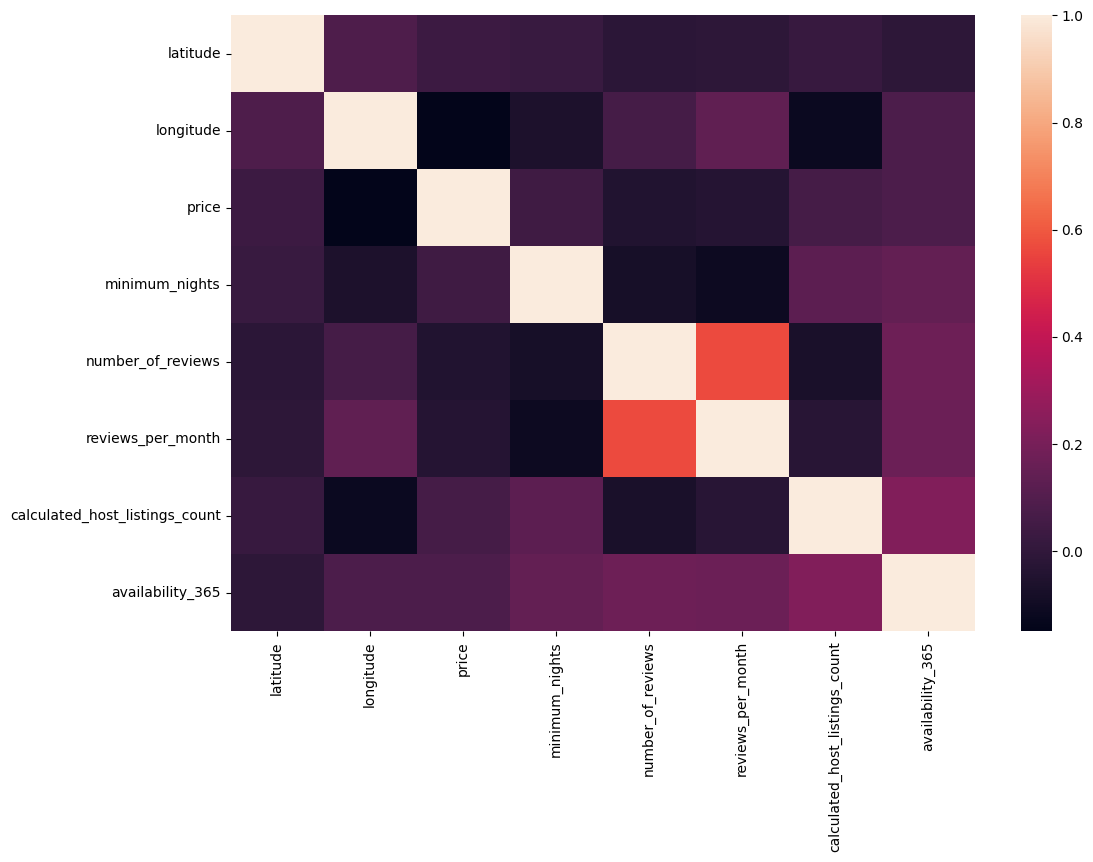

In [ ]:
# Correlation Heatmap visualization code
# Chart - 1 visualization code
plt.figure(figsize=(12,8))
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=False, linewidths=0)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is the best for analyzing correlations between all possible variables

##### 2. What is/are the insight(s) found from the chart?

Theres not much correlation between these variables , ie they are independent

#### Chart - 15 - Pair Plot

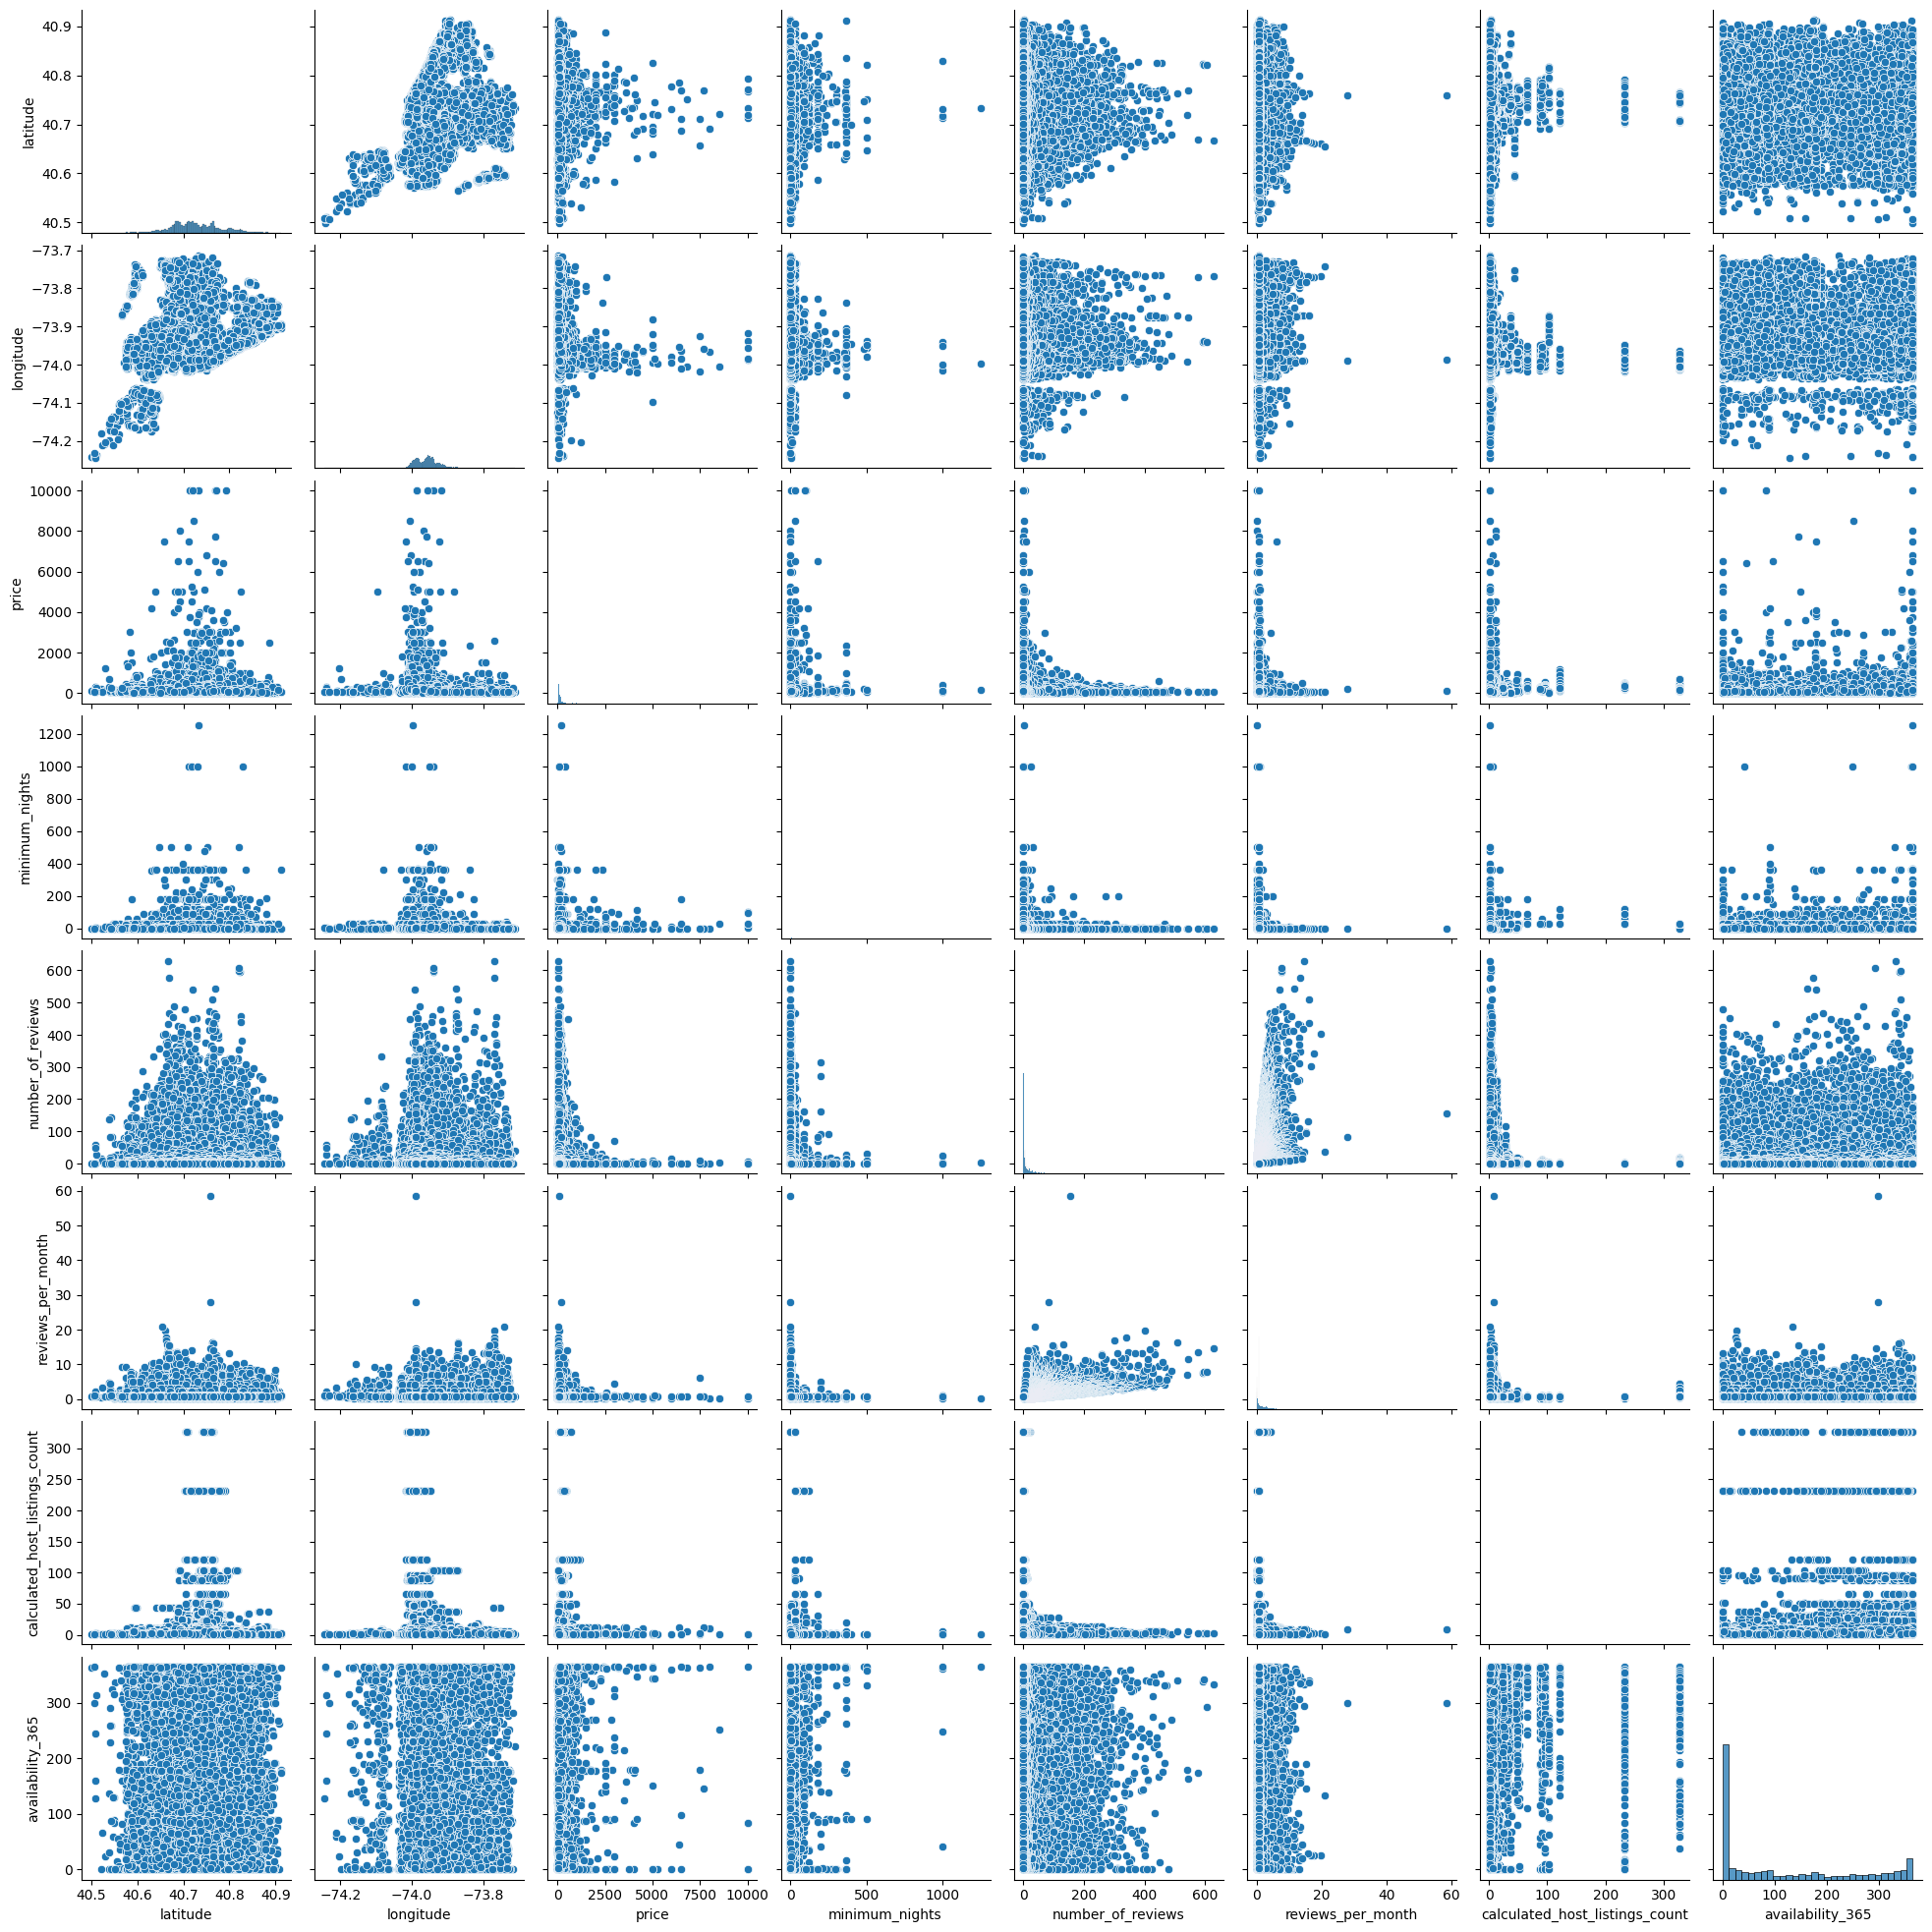

In [ ]:
# Pair Plot visualization code


sns.pairplot(df)


##### 1. Why did you pick the specific chart?

Pairplot draws all possible graphs for given variables

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Most of listings are in brooklyn or manhattan. If you want to rent out flats , then brooklyn & manhattan are the best places to do it

Entire homes & private rooms are majority of listings. Seems like private rooms & entire homes are in demand

Majority of listings lies between latitudes - 40.65 - 40.75. If you want to advertise your flat you can do it in these locations

majority of listings lie in longitude ranges - 74-73.9. this can help us to find where we should advertise our flats to rent

majority of listings have 0 to 10 min nights, theres also a a considerable number of 30 minimum nights. 0 to 10 minimum nights & 30 nights package seems to be the industry standards

majority of listings are available for 0-100 days per year , mosIf youre starting a rental business , then its advisable to make it available for weekends.t likely weekends [52 weeks per year ie 52 weekends ie around 100 days]. There are also a lot of listings that are available almost entire year.

Staten Island & manhattan are the most expensive , then bronx & brooklyn. If you want to setup a high end apartment for rent theses are the places to do so - Staten islands , manhattan

the prices & number of listings seems to be higher between latitudes 40.6 - 40.8. For advertising and setting up your rental business , the above latitude range is the best

Majority of listings lie between longitude -74 to -73.9. The graph shows that the longitude range above has the highest number of renting opportunities & its the best for advertizement.

Entire homes/apartmentys are the most expensive, followed by private rooms. For maximum profits , invest in entire apatments/rooms & private rooms.

it seems like listings with lesser minimum nights seems to be more popular & charge more.
seems like 30 nights plan are popular too , followed by 60 & 90 nights plans. Keep the minimum nights as less as possible while setting up your rental business. also include 30,60,90 days package.

Shared rooms have the most availability , followed by entire home & private rooms. If you want to gain max profits , increase availability in entire rooms since theyre more expensive & hence more profitable.

Bar charts are the best to compare categorical variables.listings in staten islands & bronx seems to have highest availability , followed by brooklyn & queens.





### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***